In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

C:\Users\agarw\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load Dataset
(data_train, _), (data_test, _) = mnist.load_data()



In [3]:
data_train = data_train.astype('float32') / 255
data_test = data_test.astype('float32') / 255

In [4]:
data_train = data_train.reshape(len(data_train), 28, 28, 1)
data_test = data_test.reshape(len(data_test), 28, 28, 1)

In [5]:
#Add noise to the dataset
noise_factor = 0.6
train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)


In [6]:
train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)

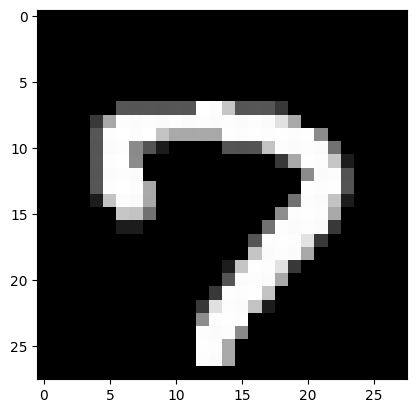

In [7]:
# Plot some images
idx = np.random.randint(len(data_test))
plt.imshow(data_test[idx].reshape(28, 28))
plt.gray()
plt.show()

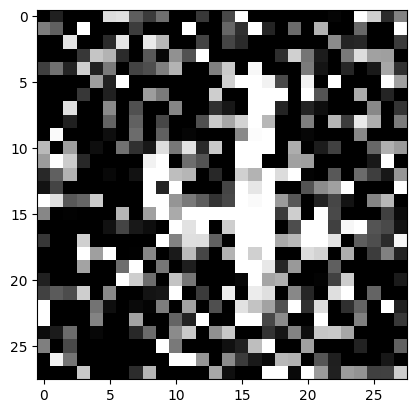

In [8]:
idx = np.random.randint(len(data_test))
plt.imshow(test_noisy[idx].reshape(28, 28))
plt.gray()
plt.show()

In [9]:
autoencoder = Sequential([
    # Encoder
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    # Decoder
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    # Output layer
    Conv2D(1, 3, activation='sigmoid', padding='same')
])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)      

In [10]:
autoencoder.fit(train_noisy, data_train, epochs=20, batch_size=256, validation_data=(test_noisy, data_test))

Epoch 1/20

235/235 [==============================] - 17s 67ms/step - loss: 0.2481 - val_loss: 0.1540
Epoch 2/20
235/235 [==============================] - 15s 64ms/step - loss: 0.1454 - val_loss: 0.1380
Epoch 3/20
235/235 [==============================] - 15s 63ms/step - loss: 0.1352 - val_loss: 0.1304
Epoch 4/20
235/235 [==============================] - 15s 64ms/step - loss: 0.1299 - val_loss: 0.1264
Epoch 5/20
235/235 [==============================] - 15s 64ms/step - loss: 0.1267 - val_loss: 0.1239
Epoch 6/20
235/235 [==============================] - 15s 65ms/step - loss: 0.1246 - val_loss: 0.1221
Epoch 7/20
235/235 [==============================] - 15s 64ms/step - loss: 0.1229 - val_loss: 0.1208
Epoch 8/20
235/235 [==============================] - 15s 64ms/step - loss: 0.1218 - val_loss: 0.1200
Epoch 9/20
235/235 [==============================] - 15s 64ms/step - loss: 0.1205 - val_loss: 0.1185
Epoch 10/20
235/235 [==============================] - 16s 66ms/step - loss: 0.11

In [11]:
predictions = autoencoder.predict(test_noisy)

313/313 [==============================] - 1s 3ms/step


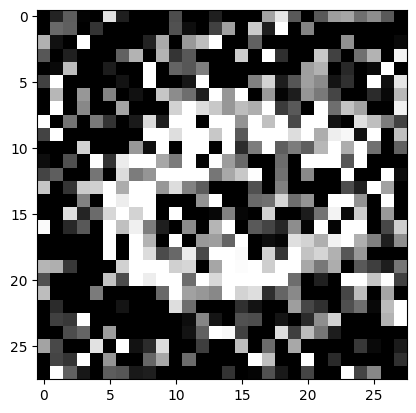

In [12]:
# Plot results
idx = np.random.randint(len(data_test))
plt.imshow(test_noisy[idx].reshape(28, 28))
plt.gray()
plt.show()

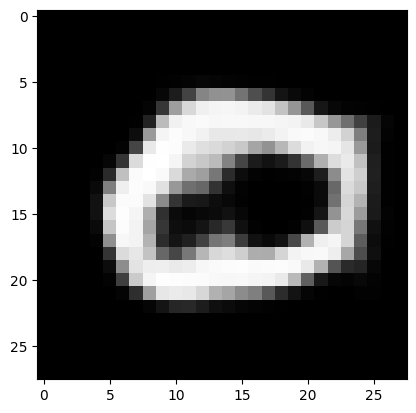

In [13]:
plt.imshow(predictions[idx].reshape(28, 28))
plt.gray()
plt.show()

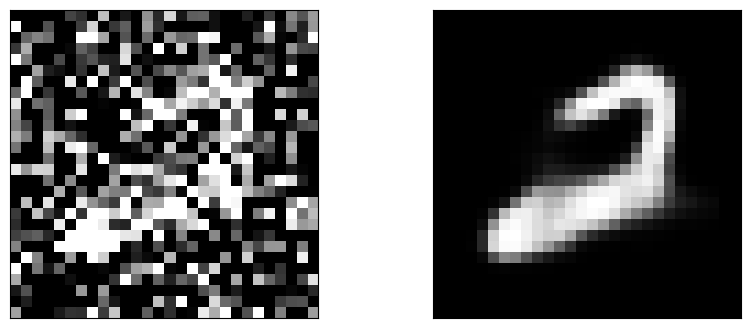

In [14]:
# Another example
idx = np.random.randint(len(data_test))
plt.figure(figsize=(10, 4))

# Display original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(test_noisy[idx].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display denoised image
ax = plt.subplot(1, 2, 2)
plt.imshow(predictions[idx].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

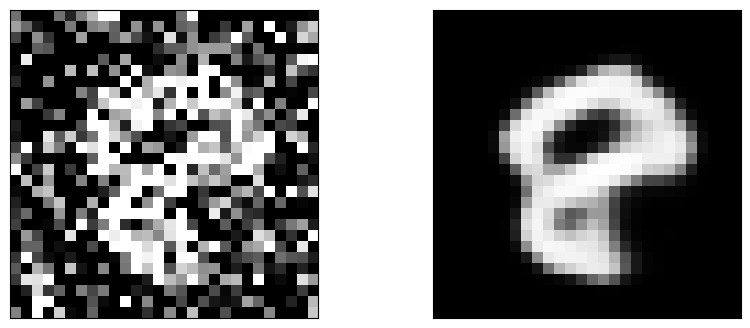

In [15]:
# Yet another example
idx = np.random.randint(len(data_test))
plt.figure(figsize=(10, 4))

# Display original noisy image
ax = plt.subplot(1, 2, 1)
plt.imshow(test_noisy[idx].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display denoised image
ax = plt.subplot(1, 2, 2)
plt.imshow(predictions[idx].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()